In [163]:
######## PREGUNTA 1 #########

# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [164]:
df_data = pd.read_csv('dataset_prueba.csv')
df_data

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,date_of_last_rech,last_day_rch_amt,date_of_last_rech_data,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number
0,8/31/2014,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.00,0.0,2,252,252,8/8/2014,252,8/8/2014,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,0,7000842753
1,8/31/2014,268.321,7.68,304.76,0.00,0.00,7.68,291.86,0.00,0.00,299.54,0.00,0.13,0.00,0.0,0.13,0.00,12.76,0.00,312.44,29.23,375.58,3.61,408.43,2.35,12.49,0.00,0.0,14.84,423.28,0.0,0.00,0.0,11,283,65,8/28/2014,30,8/10/2014,2.0,25.0,2.0,0.0,50.0,365.47,0.00,0.00,7.60,0.0,0,2,0,0,1.0,0,7001865778
2,8/31/2014,210.226,37.26,208.36,0.00,0.00,13.58,38.46,15.61,45.76,67.66,22.58,75.53,22.83,0.0,120.94,0.00,96.84,0.00,285.46,67.46,38.89,49.63,155.99,28.69,167.09,43.23,0.0,239.03,395.03,0.0,0.00,0.0,2,116,86,8/14/2014,86,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7001625959
3,8/31/2014,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,289.58,6.53,0.00,0.0,296.11,0.00,18.09,0.00,352.21,8.04,20.28,19.84,48.18,0.00,4.94,0.00,0.0,4.94,53.13,0.0,0.00,0.0,18,601,50,8/31/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7001204172
4,8/31/2014,238.174,83.89,124.26,0.00,0.00,83.89,124.26,0.00,0.00,208.16,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,208.16,233.81,104.13,0.00,337.94,0.86,0.00,0.00,0.0,0.86,338.81,0.0,0.00,0.0,3,287,110,8/9/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7000142493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299992,6/30/2014,18.471,5.40,15.19,0.00,0.00,5.40,12.78,0.00,0.00,18.18,0.00,0.00,0.00,0.0,0.00,0.00,2.41,0.00,20.59,27.68,47.96,17.45,93.09,0.00,0.00,0.00,0.0,0.00,93.09,0.0,0.00,0.0,2,60,60,6/3/2014,60,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7001548952
299993,6/30/2014,112.201,29.26,100.83,0.00,0.00,28.93,91.34,1.71,0.00,121.99,0.33,4.83,2.93,0.0,8.09,0.00,0.00,0.00,130.09,12.21,37.38,2.16,51.76,0.00,4.34,0.00,0.0,4.34,56.11,0.0,0.00,0.0,5,110,110,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7000607688
299994,6/30/2014,229.187,1.11,21.04,0.00,0.00,1.11,13.33,0.00,4.71,14.44,0.00,0.00,0.00,0.0,0.00,0.00,8.28,2.41,25.14,93.01,380.68,0.00,473.69,0.00,0.00,0.00,0.0,0.00,473.69,0.0,0.00,0.0,5,119,50,6/13/2014,30,6/13/2014,2.0,25.0,2.0,0.0,39.0,0.21,275.85,141.48,2.40,0.0,0,2,0,0,1.0,0,7000087541
299995,6/30/2014,322.991,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.81,0.00,0.00,0.00,0.0,0.00,0.81,0.0,0.00,0.0,3,381,202,6/17/2014,202,6/17/2014,3.0,202.0,1.0,2.0,583.0,76.51,1453.63,235.68,235.68,0.0,0,1,1,1,1.0,0,7000498689


In [165]:
# Se obtiene umbral de arpu para condición platino

cond1_platino = df_data["arpu"].quantile(0.9)

# Se obtiene umbral de arpu para condición gold

cond1_gold = df_data["arpu"].quantile(0.8)

# Se establece array de condiciones para la generación de la columna

cond1_condiciones = [
    (df_data["arpu"] >= cond_platino),
    (df_data["arpu"] >= cond_gold) & (df_data["arpu"] < cond_platino),
    (df_data["arpu"] < cond_gold),
]

# array de etiquetas
cond1_etiquetas = ["platino", "gold", "normal"]

# adición de columna
df_data["clasificacion_clientes_revenue"] = np.select(cond_condiciones, cond_etiquetas, default="Not Specified")

#df_data[["arpu","clasificacion_clientes_revenue"]]

#contar clientes por clasificacion
cond1_count = df_data["clasificacion_clientes_revenue"].value_counts()

print(cond1_count)

clasificacion_clientes_revenue
normal     239997
gold        30000
platino     30000
Name: count, dtype: int64


In [166]:
######## PREGUNTA 2 #########

# adición de columna flag_recarga según condicion
df_data["flag_recarga"] = np.where(df_data["total_rech_num"] >= 1, 1, 0)

#contar clientes por recarga
cond2_count = df_data["flag_recarga"].value_counts()

print(cond2_count)


flag_recarga
1    293001
0      6996
Name: count, dtype: int64


In [167]:
######## PREGUNTA 3 #########

# contar cuantas entradas hay por last_date

cond3_count_prev1 = df_data.value_counts(["last_date_of_month"])
#print(cond3_count_prev1)

# contar cuantos churn hay por mes

cond3_count_prev = df_data.value_counts(["churn","last_date_of_month"])
#print(cond3_count_prev)

# calcular la proporcion de churn

cond3_count = df_data.groupby(["last_date_of_month"])["churn"].value_counts(["churn","last_date_of_month"])
print(cond3_count)

last_date_of_month  churn
6/30/2014           0        0.989620
                    1        0.010380
7/31/2014           0        0.984778
                    1        0.015222
8/31/2014           0        0.980970
                    1        0.019030
Name: proportion, dtype: float64


In [168]:
######## PREGUNTA 4 #########

#obtención de columnas con datos null

df_ratio = (df_data.isnull().sum() / len(df_data)*100).sort_values(ascending = False).to_frame(name="Perc")
#print(df_ratio)

#obtención de columnas a eliminar
columnas_a_borrar = df_ratio.index[df_ratio['Perc'] >= 70.0].tolist()
print(columnas_a_borrar)
print(len(columnas_a_borrar))

# eliminación de columnas obtenidas
df_data.drop(columnas_a_borrar, axis = 1, inplace = True)

#verificacion de porcentaje null para columnas actuales
#(df_data.isnull().sum() / len(df_data)*100).sort_values(ascending = False)


['arpu_2g', 'arpu_3g', 'av_rech_amt_data', 'count_rech_3g', 'count_rech_2g', 'max_rech_data', 'total_rech_data', 'date_of_last_rech_data', 'fb_user', 'night_pck_user']
10


In [169]:
#obtener nombres de las columnas numéricas

nombre_columnas = df_data.select_dtypes(include=['number']).columns.values
#print(nombre_columnas)

#obtener desglose de data por columna

for i in nombre_columnas:
    print(df_data[i].value_counts())
    print(df_data[i].corr(df_data["churn"]))
    
   

arpu
 0.000      13215
-5.000        454
 1.000        186
 20.000       181
 1.500        147
            ...  
 19.784         1
 98.260         1
 193.835        1
 42.622         1
 687.065        1
Name: count, Length: 218899, dtype: int64
-0.07841188172913459
onnet_mou
0.00       27638
1.01         228
0.48         221
0.26         199
0.36         199
           ...  
780.81         1
1396.56        1
243.83         1
324.63         1
806.73         1
Name: count, Length: 42317, dtype: int64
-0.012660964685087909
offnet_mou
0.00       11731
1.01         112
0.03         109
0.01          99
0.36          86
           ...  
338.24         1
1535.28        1
701.24         1
762.39         1
784.76         1
Name: count, Length: 49784, dtype: int64
-0.013559589111806276
roam_ic_mou
0.00      238210
1.01         221
0.30         104
0.03          99
0.20          98
           ...  
490.03         1
278.79         1
106.56         1
84.16          1
385.51         1
Name: count, L

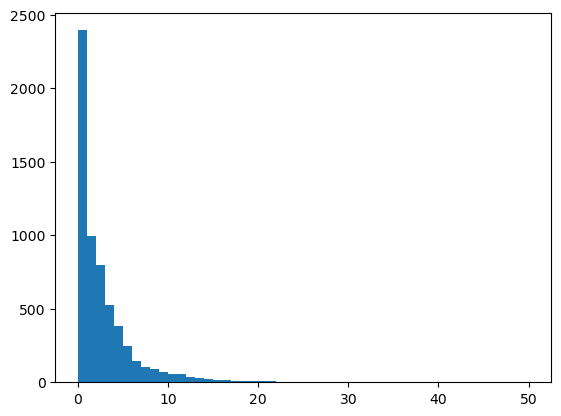

In [170]:
######## PREGUNTA 5 #########

# se separan los datos según condición de churn

sin_churn = df_data.loc[df_data["churn"] == 0]
con_churn = df_data.loc[df_data["churn"] == 1]

# se grafican datos que presentan churn
plot.hist(x=con_churn["total_rech_num"], bins=50, range=[0,50])
plot.show()

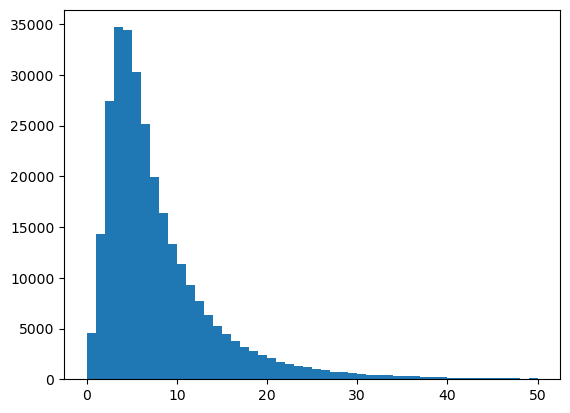

In [171]:
# se grafican datos que no presentan churn
plot.hist(x=sin_churn["total_rech_num"], bins=50, range=[0,50])
plot.show()

In [177]:
### Se aprecia que la variable total_rech_num alcanza valores mayores cuando no existe churn. Al existir churn, el máximo
### de valores se encuentran cerca del 0.

######## PREGUNTA 6 #########

df_data.head()

#Se eliminan columnas con datos de tipo no numérico, puesto que se realizará una regresión logística. Se asume que las fechas son irrelevantes, al igual que los números móviles y la clasificación por arpu, dato que se tiene de forma numérica

df_data.drop(["last_date_of_month", "date_of_last_rech", "mobile_number", "clasificacion_clientes_revenue"], axis = 1, inplace = True)

#Adicionalmente, se eliminan columnas que mostraron nula correlación (<0.02) en el punto de la pregunta 5
df_data.drop(["onnet_mou", "roam_og_mou", "loc_og_t2t_mou", "loc_og_t2m_mou", "loc_og_t2f_mou", "loc_og_t2c_mou", "loc_og_mou", "std_og_t2t_mou", "std_og_t2m_mou", "std_og_t2f_mou", "std_og_t2c_mou", "isd_og_mou", "spl_og_mou", "og_others", "total_og_mou", "loc_ic_t2t_mou", "loc_ic_t2f_mou", "std_ic_t2t_mou", "std_ic_t2m_mou", "std_ic_t2f_mou", "std_ic_t2o_mou", "std_ic_mou", "spl_ic_mou", "isd_ic_mou", "ic_others", "vol_2g_mb", "vol_3g_mb", "monthly_3g", "sachet_3g", "offnet_mou", "roam_ic_mou", "std_og_mou", "loc_ic_t2m_mou", "loc_ic_mou"], axis = 1, inplace = True)


In [178]:
### Se importan librerías sklearn

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_data.describe()


,arpu,total_ic_mou,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,monthly_2g,sachet_2g,churn,flag_recarga
count,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000,299997.000000
mean,280.226246,200.577958,7.490695,324.878235,105.706030,61.727924,0.081287,0.426364,0.020264,0.976680
std,337.092764,293.060220,7.120709,407.631647,124.048714,99.318085,0.299700,1.589447,0.140901,0.150919
min,-2258.709000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,39.380000,3.000000,100.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,193.883000,115.210000,5.000000,224.000000,100.000000,30.000000,0.000000,0.000000,0.000000,1.000000
75%,368.626000,250.460000,9.000000,433.000000,130.000000,110.000000,0.000000,0.000000,0.000000,1.000000
max,35145.834000,10830.380000,307.000000,45320.000000,4449.000000,4449.000000,5.000000,48.000000,1.000000,1.000000


In [189]:
#obtención de columnas con datos null

df_ratio = (df_data.isnull().sum() / len(df_data)*100).sort_values(ascending = False).to_frame(name="Perc")
#print(df_ratio)

#Se revisan columnas con datos nulos

variables = np.array(df_data.drop(['churn'],axis=1))
target = np.array(df_data['churn'])

# Se entrena el modelo de regresión logística
modelo = linear_model.LogisticRegression(max_iter=400)
modelo.fit(variables,target)

LogisticRegression(max_iter=400)

In [193]:
# Se genera una predicción

prediccion = modelo.predict(variables)

modelo.score(variables,target)

# se establece la data de validacion y se divide la data

validacion = 0.2
variable_training, variable_validacion, target_training, target_validacion = model_selection.train_test_split(variables, target, test_size=validacion)


In [194]:
# Se genera una nueva predicción

prediccion_validacion = modelo.predict(variable_validacion)
print(accuracy_score(target_validacion, prediccion_validacion))

0.9790333333333333


In [195]:
# Se obtiene la matriz de confusión

print(confusion_matrix(target_validacion, prediccion_validacion))

[[58742     0]
 [ 1258     0]]


In [ ]:
### Respuestas:

### S

###6.a) Se escogió en primera instancia el puntaje de accuracy del modelo para obtener una vista general del rendimiento al mirar las predicciones totales identificadas correctamente
###     luego, se calcula la matriz de confusión para evaluar el resultado del modelo, observando que éste resultó erróneo al obtener solo resultados de no churn, observando que el alto nivel de Accuracy se debe a la baja proporción de casos negativos respecto al numero total de casos

###6.b) Para mejorar la performance del modelo se podrían reducir más variables para únicamente considerar aquellas que guardan una relación considerable con el target (el valor de 0.02 para la correlación fue muy bajo)
###     

###6.c) Se escogió el modelo de regresión logística, puesto que se determinó que las variables de interés para la predicción eran de tipo numérico, mientras que el target es del tipo binario 
